In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('/content/Traffic_Volume.csv')

In [4]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [10]:

data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [11]:
data.shape

(48204, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [13]:
data.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [14]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


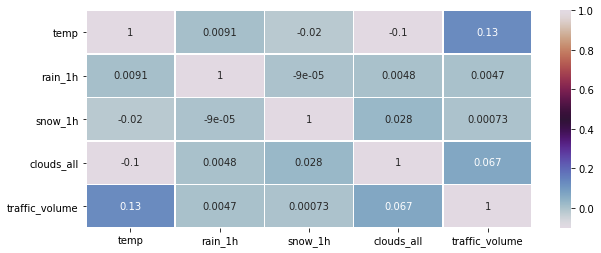

In [15]:

corr = data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='twilight')
plt.show()

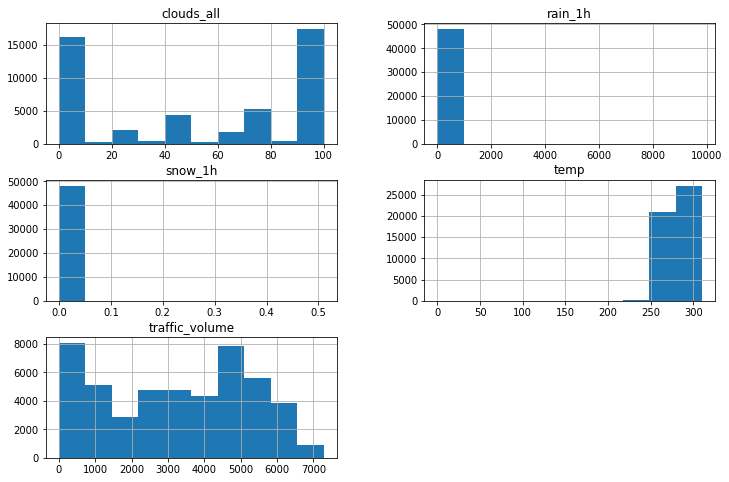

In [16]:

data.hist(figsize=(12,8))
plt.show()

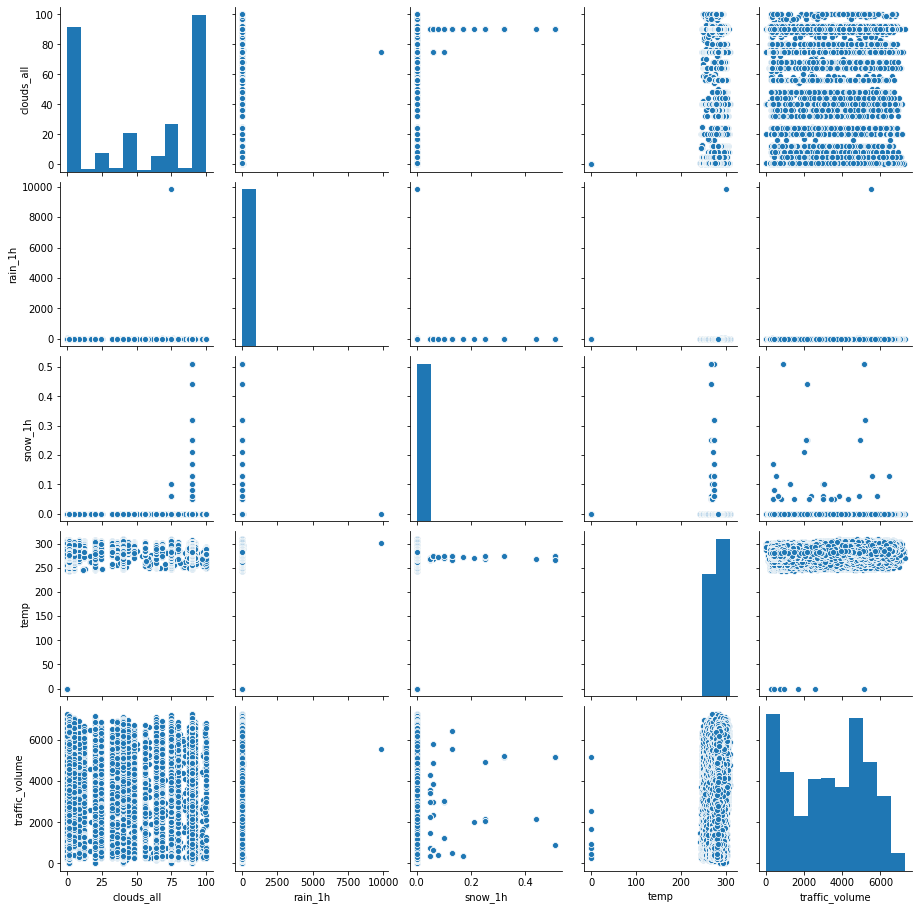

In [17]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(data[cols])
plt.show()


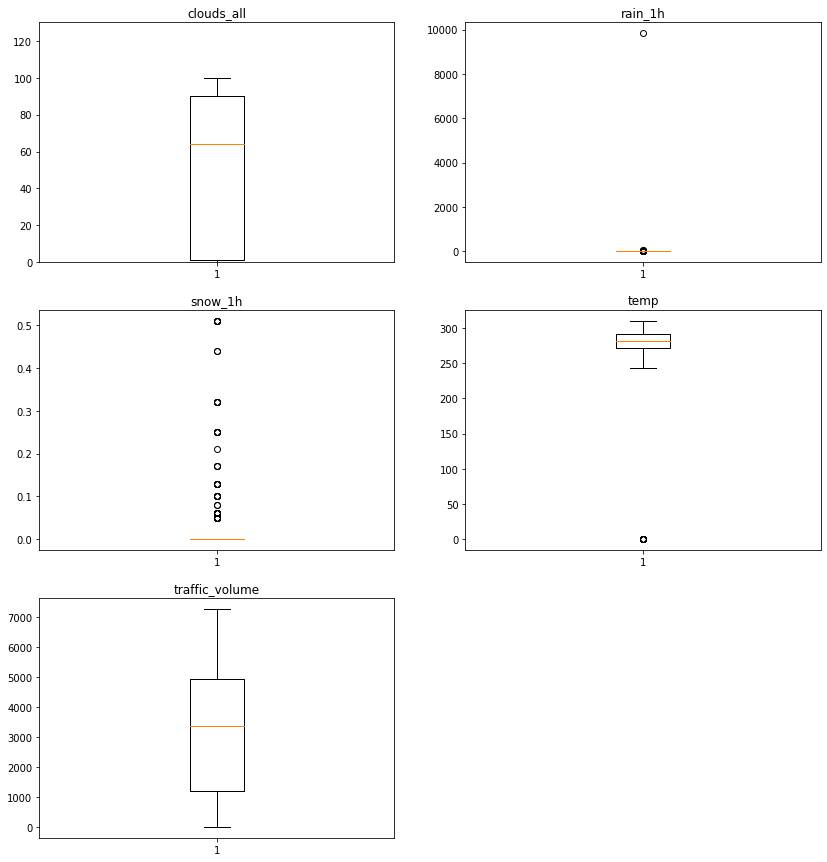

In [18]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(data['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(data['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(data['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(data['traffic_volume'])
plt.title('traffic_volume')

plt.show()

In [19]:

# rain_1h column
data[(data['rain_1h'] == data['rain_1h'].max())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24872,None,302.11,9831.3,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


In [20]:
data[(data['weather_description']=='very heavy rain')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
7133,None,291.76,16.38,0.0,76,Rain,very heavy rain,2013-06-22 05:00:00,635
7179,None,295.82,44.45,0.0,76,Rain,very heavy rain,2013-06-24 11:00:00,4802
7664,None,292.82,19.90,0.0,20,Rain,very heavy rain,2013-07-14 05:00:00,542
7667,None,292.65,25.32,0.0,8,Rain,very heavy rain,2013-07-14 06:00:00,958
7670,None,292.87,21.42,0.0,90,Rain,very heavy rain,2013-07-14 07:00:00,1745
8247,None,289.10,55.63,0.0,68,Rain,very heavy rain,2013-08-07 02:00:00,315
10734,None,262.65,18.80,0.0,64,Rain,very heavy rain,2013-12-16 19:00:00,2755
10806,None,264.50,28.70,0.0,64,Rain,very heavy rain,2013-12-19 23:00:00,1190
14853,None,298.21,18.03,0.0,0,Rain,very heavy rain,2014-06-02 16:00:00,6443
16300,None,294.87,23.80,0.0,90,Rain,very heavy rain,2015-07-06 03:00:00,346


In [21]:
# temp column
data[(data['temp'] == data['temp'].min())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


In [22]:

med_val = data['rain_1h'][(data['weather_description']=='very heavy rain') & (data['traffic_volume'] > 4000)].median()

In [23]:
data['rain_1h'][data['rain_1h'] == data['rain_1h'].max()] = med_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
import calendar
from datetime import datetime

In [25]:
data['Year']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').year for i in data['date_time']]
data['Month'] = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').month for i in data['date_time']]
data['Day']   = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').day for i in data['date_time']]
data['Hour']  = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S').hour for i in data['date_time']]

In [26]:
data[data['temp'] == 0.0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361,2014,1,31,3
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734,2014,1,31,4
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557,2014,1,31,5
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150,2014,1,31,6
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291,2014,2,2,3
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284,2014,2,2,4
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434,2014,2,2,5
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739,2014,2,2,6
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962,2014,2,2,7
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670,2014,2,2,8


In [27]:

data[(data['Year'] == 2014) & (data['Month'] == 1 ) & (data['Day'] == 31)].head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11895,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 00:00:00,644,2014,1,31,0
11896,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 01:00:00,390,2014,1,31,1
11897,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 02:00:00,313,2014,1,31,2
11898,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361,2014,1,31,3
11899,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734,2014,1,31,4
11900,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557,2014,1,31,5
11901,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150,2014,1,31,6
11902,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 07:00:00,5363,2014,1,31,7
11903,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 08:00:00,5269,2014,1,31,8
11904,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 09:00:00,4721,2014,1,31,9


In [28]:
data['temp'][(data['Day'] == 31) & (data['temp'] == 0.0)] = 255.93

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data[(data['Year'] == 2014) & (data['Month'] == 2 ) & (data['Day'] == 2)].head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
11943,None,255.59,0.0,0.0,0,Clear,sky is clear,2014-02-02 00:00:00,1143,2014,2,2,0
11944,None,255.48,0.0,0.0,0,Clear,sky is clear,2014-02-02 01:00:00,695,2014,2,2,1
11945,None,255.37,0.0,0.0,0,Clear,sky is clear,2014-02-02 02:00:00,539,2014,2,2,2
11946,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291,2014,2,2,3
11947,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284,2014,2,2,4
11948,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434,2014,2,2,5
11949,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739,2014,2,2,6
11950,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962,2014,2,2,7
11951,None,0.00,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670,2014,2,2,8
11952,None,255.62,0.0,0.0,0,Clear,sky is clear,2014-02-02 09:00:00,2506,2014,2,2,9


In [30]:
np.round(np.linspace(255.41,255.62,6,endpoint=False),2)

array([255.41, 255.44, 255.48, 255.52, 255.55, 255.58])

In [31]:
data['temp'][data['temp'] == 0] = [i for i in np.round(np.linspace(255.41,255.62,6,endpoint=False),2)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data.drop('date_time',axis=1,inplace=True)

In [33]:
data = data[['holiday','temp','rain_1h','snow_1h','Year','Month','Day','Hour','weather_main','weather_description','traffic_volume']]

In [ ]:
data.head()

In [37]:
data.to_csv('Metro-Traffic-Volume.csv',header=True,index=False)